# **EXPLORAÇÃO DE DADOS**

#### Importação de dados e bibliotecas

In [3]:
# Data Handling
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('Solarize_Light2')

In [4]:
df = pd.read_csv(filepath_or_buffer="../data/water_potability.csv")

# **EDA PARA DADOS UNIVARIADOS**

### OUTLIERS

- #### Medidas de Localidade

    - Baixas diferenças entre média e mediana de uma base de dados, pode significar que a distribuição dos dados é simétrica (tendendo ao desenho de uma distribuição normal) e com baixos índices de anomalias.

    - As colunas de Solids e Conductivity, apresenta uma diferença considerável entre as duas medidas de localidade, concluindo que são dois atributos que podem precisar de um tratamento para anomalias.

In [5]:
df.drop(columns="Potability").describe().loc[
    ["mean", "50%"], :
].rename(
    {"mean":"média", "50%":"mediana"}
)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
média,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786
mediana,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028


- #### Distribuição dos dados
    - Do mesmo modo que a diferença entre medidas de localidade demonstram a presença de outliers na base de dados, o histograma também aponta essa característica dos dados.
    - Para base de dados que possuem baixos índices de anomalias, o desenho do histograma vai tender para o mesmo desenho de uma distribuição normal. Já as bases de dados com alto indíces de anomalias, vão ter o desenho do gráfico assimétrico e tendendo para o lado que possuir mais anomalias.
    
    - Percebe-se que a mesma conclusão tirada da análise das medidas de localidade, se comprova ao analisar o histograma das colunas Solids e Conductivity, onde estão com o gráfico assimétrico e tendencioso para um lado. Já os outros atributos, possuem um desenho mais simétrico e parecido com uma distribuição normal.


array([[<Axes: title={'center': 'ph'}>,
        <Axes: title={'center': 'Hardness'}>,
        <Axes: title={'center': 'Solids'}>],
       [<Axes: title={'center': 'Chloramines'}>,
        <Axes: title={'center': 'Sulfate'}>,
        <Axes: title={'center': 'Conductivity'}>],
       [<Axes: title={'center': 'Organic_carbon'}>,
        <Axes: title={'center': 'Trihalomethanes'}>,
        <Axes: title={'center': 'Turbidity'}>]], dtype=object)

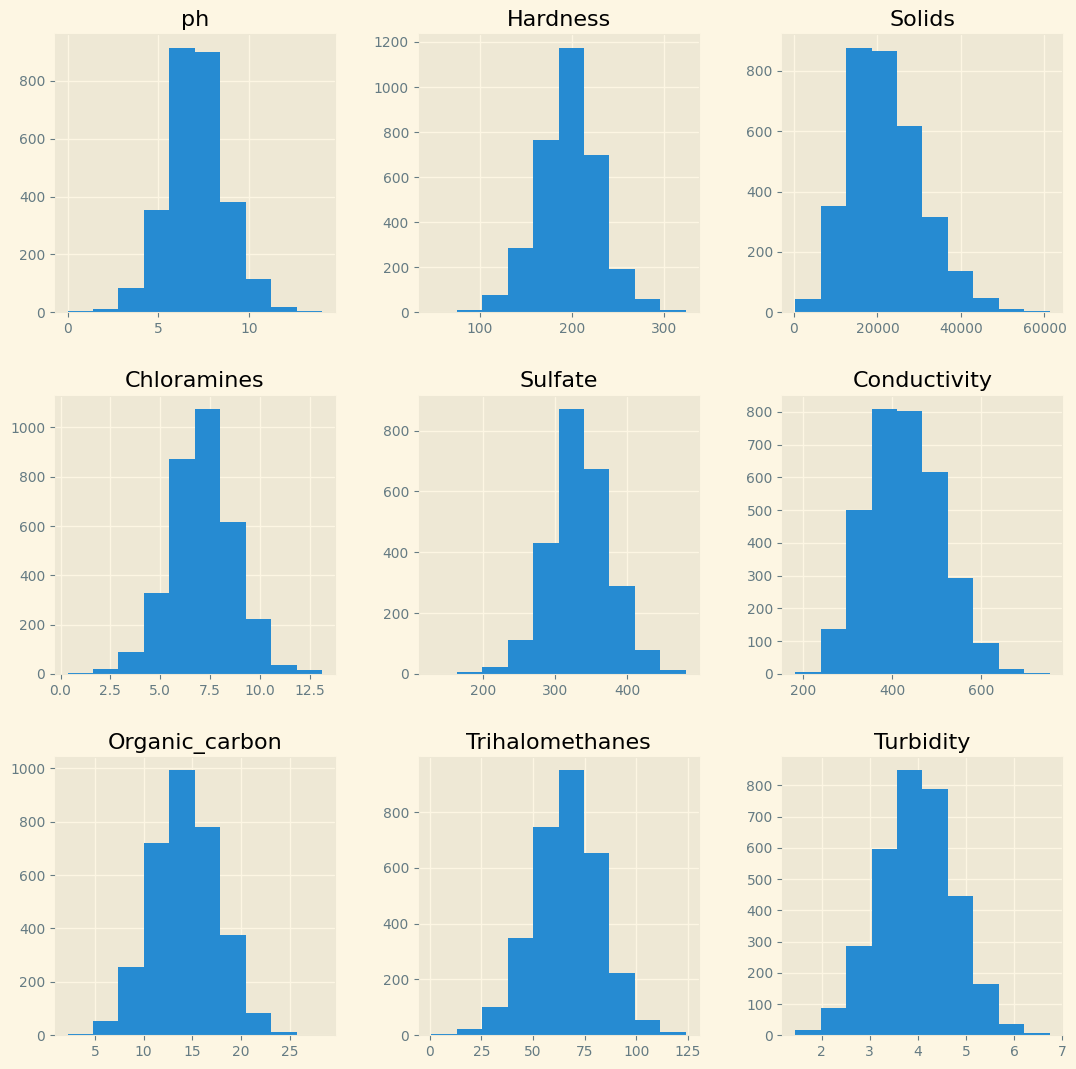

In [6]:
df.drop(columns="Potability").hist(figsize=(13,13))

<Axes: >

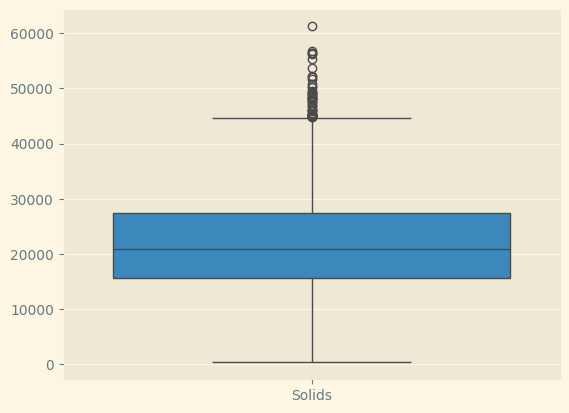

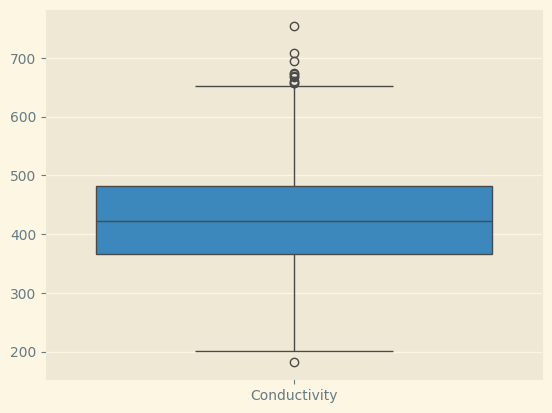

In [7]:
plt.figure()
sns.boxplot(data=df[["Solids"]])
plt.figure()
sns.boxplot(data=df[["Conductivity"]])

### DADOS FALTANTES
- Dados faltantes é um problema que pode acontecer com dados do mundo real, já que sensores e anotações manuais estão sucetiveis a erros.
- É preciso tomar cuidado ao tratar os dados faltantes, já que deletar amostras pode alterar a distribuição dos dados e tendenciar os modelos treinados com essa base de dados. Ou criar muitos dados artificialmente, também não é ideal para manter a qualidade da base.
- Com um percentual baixo de dados faltantes, é possível utilizar duas abordagens: Undersampling (remoção de amostras com falta de informação) ou Oversampling (criação artificial de dados) no atributo com dados faltantes.
- É possível testar modelos treinados com bases tratadas com Undersampling e Oversampling, para entender qual abordagem os modelos vão desempenhar melhor.

- Neste caso é possível visualizar que há dados faltantes nas colunas de ph, Sulfate e Trihalomethanes e possum uma porcentaem abaixo de 30%.
- Na etapa de pré-processamento será necessário tratar os dados faltantes para treinar os modelos posteriormente.

In [38]:
pd.DataFrame(data={
    "Percentual (%)": round((df.isnull().sum() / df.shape[0]) * 100, 3),
    "Quantidade": df.isnull().sum()
})

,Percentual (%),Quantidade
ph,14.988,491
Hardness,0.000,0
Solids,0.000,0
Chloramines,0.000,0
Sulfate,23.840,781
Conductivity,0.000,0
Organic_carbon,0.000,0
Trihalomethanes,4.945,162
Turbidity,0.000,0
Potability,0.000,0


Text(0, 0.5, 'Dados Faltantes')

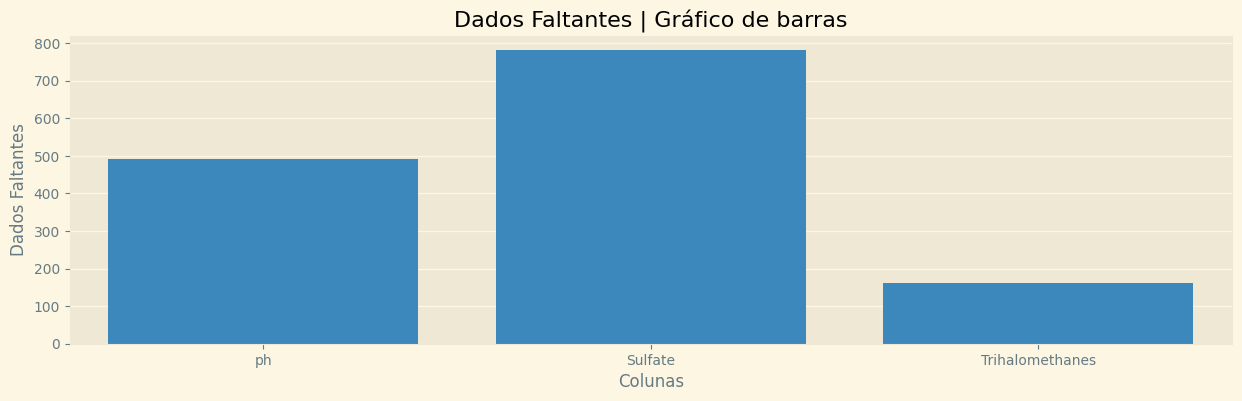

In [37]:
plt.figure(figsize=(15,4))
sns.barplot(
    x=df.isnull().sum()[(df.isnull().sum() > 0)].index,
    y=df.isnull().sum()[(df.isnull().sum() > 0)]
)
plt.title("Dados Faltantes | Gráfico de barras")
plt.xlabel("Colunas")
plt.ylabel("Dados Faltantes")

## VARIÁVEIS CATEGÓRICAS
- One Hot Enconding
    - Modelos tendenciosos
    - Problema de aumento da dimensão da base de dados
- Ao Analisar os atributos, percebe-se que todas as variáveis são numéricas, evidenciando que não há necessidade de algum tratamento em variáveis categóricas

In [49]:
df.head(n=3)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0


In [47]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

# **EDA PARA DADOS MULTIVARIADOS**

### DADOS DUPLICADOS
- Modelos tendenciosos
- Dados duplicados são 

In [39]:
df.duplicated().sum()

0

### DADOS INCONSISTENTES
- Dados com baixa qualidade
- Modelos com baixa acurácia

In [40]:
df.drop(columns="Potability").duplicated().sum()

0

### NORMALIZAÇÃO
- #### Medidas de Espalhamento
    - Intervalo
    - Diferença na dimensão dos atributos
    - Modelo tendencioso

In [42]:
df.drop(columns="Potability").describe().loc[["min", "max"], :]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
min,0.0,47.432,320.942611,0.352,129.000000,181.483754,2.2,0.738,1.450
max,14.0,323.124,61227.196008,13.127,481.030642,753.342620,28.3,124.000,6.739


### BALANCEAMENTO DA BASE DE DADOS
- Problema de desbalanceamento
- Modelo tendencioso

In [43]:
print(
    "Diferença de:",
    abs(df[['Potability']].value_counts()[0] - df[['Potability']].value_counts()[1])
)

Diferença de: 720


Text(0.5, 1.0, 'Gráfico de pizza (Atributo alvo)')

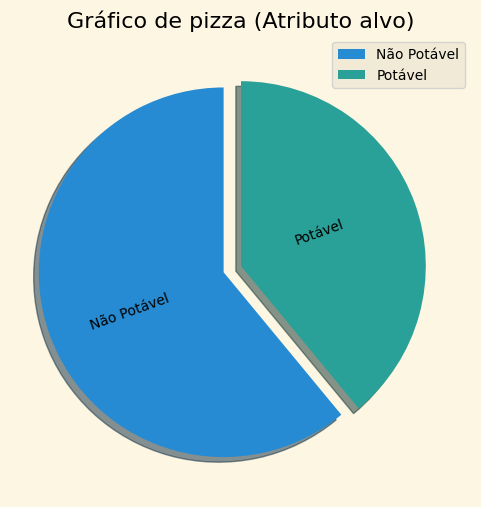

In [44]:
plt.figure(figsize=(6,6))
plt.pie(
        x=df['Potability'].value_counts(),
        explode=[0.1, 0],
        labels=['Não Potável', 'Potável'], 
        shadow=True,
        labeldistance=0.3,
        startangle=90,
        rotatelabels=True
)
plt.legend()
plt.title('Gráfico de pizza (Atributo alvo)')

### MATRIZ DE CORRELAÇÃO
- Atributos iguais
- Influência dos atributos no atributo alvo
- Corte de atributos não uteis

Text(0.5, 1.0, 'Mapa Térmico da Correlação')

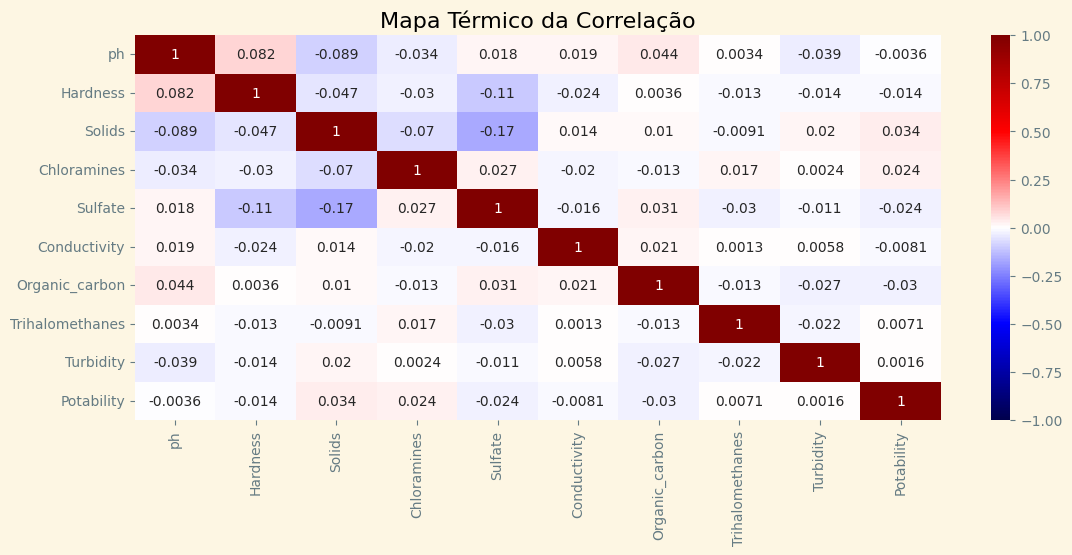

In [45]:
plt.figure(figsize=(13,5))
sns.heatmap(df.corr(), cmap='seismic', vmin=-1, vmax=1, annot=True)
plt.title('Mapa Térmico da Correlação')

### MATRIZ DE GRÁFICO DE DISPERSÃO
- Separação das classes do atributo alvo utilizando a relação entre atributos
- Sobreposição de dados

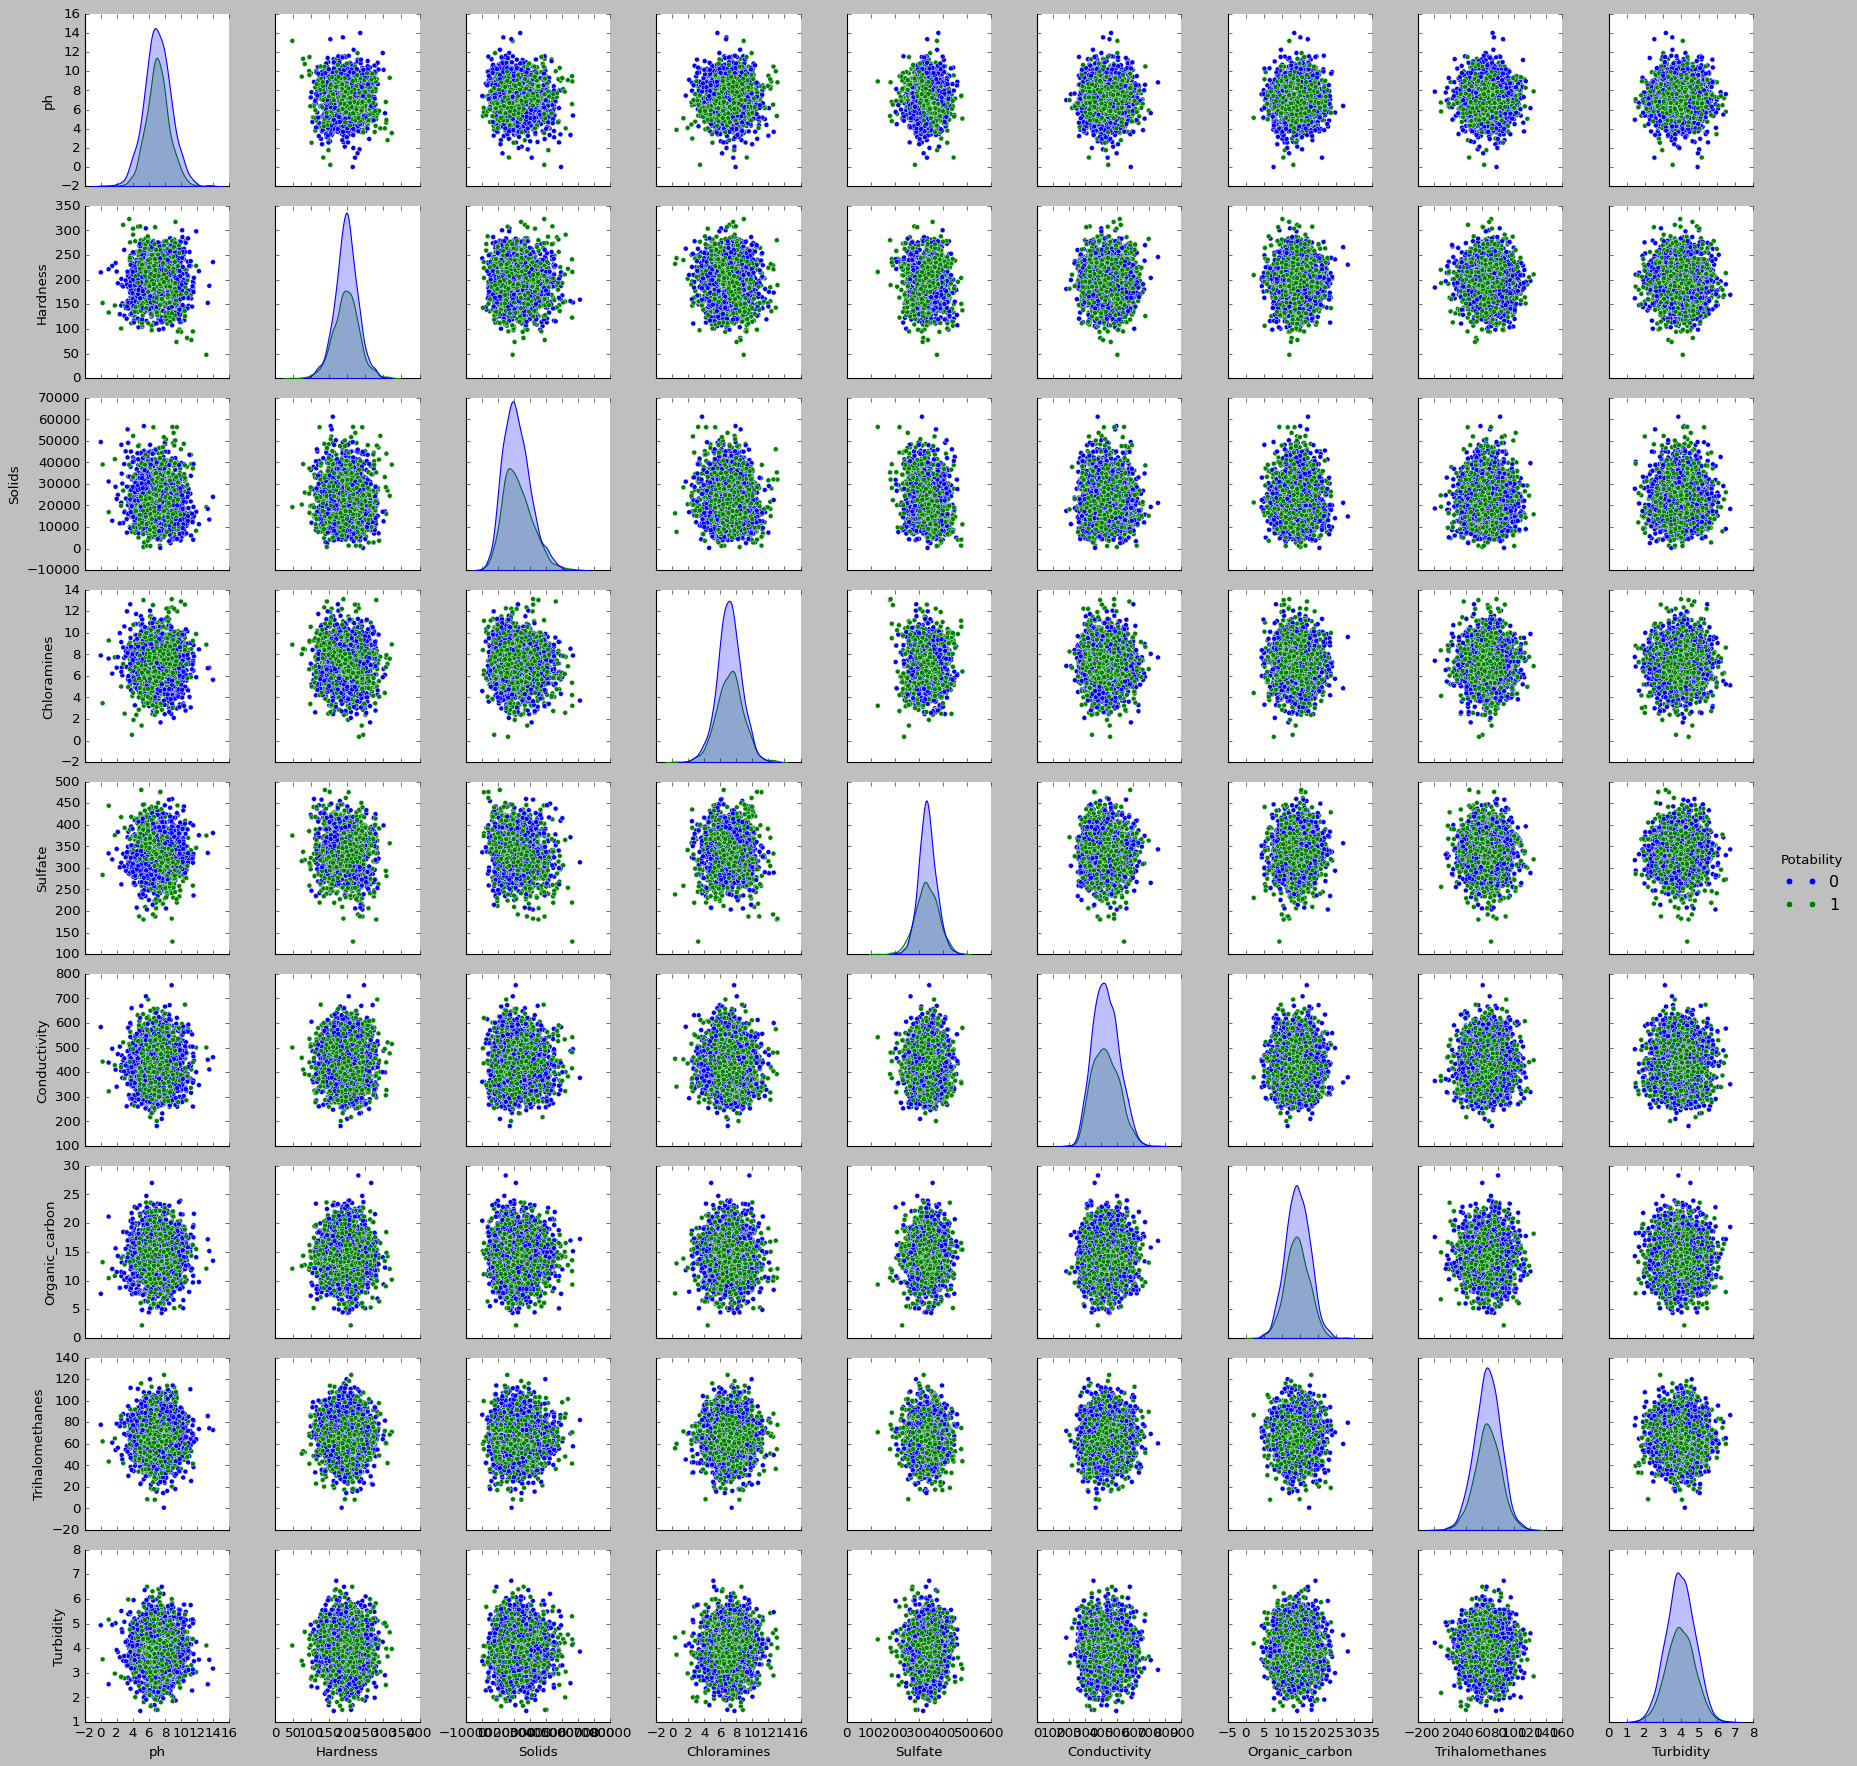

In [46]:
plt.style.use('classic')
sns.pairplot(data=df, hue='Potability')